# Linear Regresssion

$$y = 2 X + 3 + \epsilon$$

## Import libraries

In [1]:
import numpy as np

import torch

# 신경망 모형
import torch.nn as nn

# 경사하강법 알고리즘
import torch.optim as optim

# 텐서 초기값 부여
import torch.nn.init as init

# 자동미분
from torch.autograd import Variable

## Generate data

In [2]:
# 데이터의 갯수
num_data = 1000 

# 경사하강법 반복 수
num_epoch = 1000

#
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-10,10)

y = 2*x+3
y_noise = 2*x+3+noise

print(x[:10])
print(y[:10])
print(y_noise[:10])

tensor([[ 0.8465],
        [ 1.6192],
        [-2.1066],
        [-9.7760],
        [ 9.6644],
        [-3.2202],
        [ 4.2515],
        [-2.5609],
        [-2.4390],
        [ 7.4990]])
tensor([[  4.6929],
        [  6.2384],
        [ -1.2132],
        [-16.5520],
        [ 22.3287],
        [ -3.4404],
        [ 11.5030],
        [ -2.1217],
        [ -1.8780],
        [ 17.9980]])
tensor([[  5.1236],
        [  5.3199],
        [  0.0887],
        [-14.5907],
        [ 21.7484],
        [ -4.2366],
        [ 11.1833],
        [ -3.5814],
        [ -0.4250],
        [ 17.0540]])


## Define model & optimizer

- Model: 
    - linear model
    
    
- Loss function:
    - MSE
    
    
- Optimizer:
    - SGD

In [10]:
model = nn.Linear(1, 1)

loss_func = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), 
                      lr=0.01)

## Train

In [11]:
loss_arr = []
label = Variable(y_noise)

for idx, epoch in enumerate(range(num_epoch)):
    optimizer.zero_grad()
    
    output = model(Variable(x))
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if idx % 50 == 0:
        print(loss)
        
    loss_arr.append(loss.data.numpy())

tensor(119.5090, grad_fn=<MseLossBackward>)
tensor(1.9559, grad_fn=<MseLossBackward>)
tensor(1.1421, grad_fn=<MseLossBackward>)
tensor(1.0341, grad_fn=<MseLossBackward>)
tensor(1.0198, grad_fn=<MseLossBackward>)
tensor(1.0179, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)
tensor(1.0176, grad_fn=<MseLossBackward>)


In [12]:
param_list = list(model.parameters())
print(param_list[0].data,param_list[1].data)

tensor([[1.9970]]) tensor([3.0451])


- 기존 식 
    - $y = 2 X + 3 + \epsilon $

- 추정 식
    - $ \hat{y} = 1.9918 X + 3.0472 $

In [8]:
X = -2.5609
y_hat = 1.9918 * X + 3.0472

print(y_hat)

-2.05360062


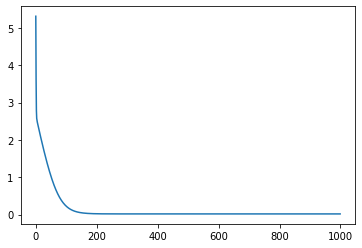

In [9]:
import matplotlib.pyplot as plt

plt.plot(np.log(loss_arr))
plt.show()